In [64]:
import pandas as pd
import seaborn as sns
import statistics  as sts
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
#importando dados
df = pd.read_csv("train.csv")
df.shape

(13730, 167)

In [67]:
#visulizar
df.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 167 entries, Unnamed: 0 to Q050
dtypes: float64(28), int64(79), object(60)
memory usage: 17.5+ MB


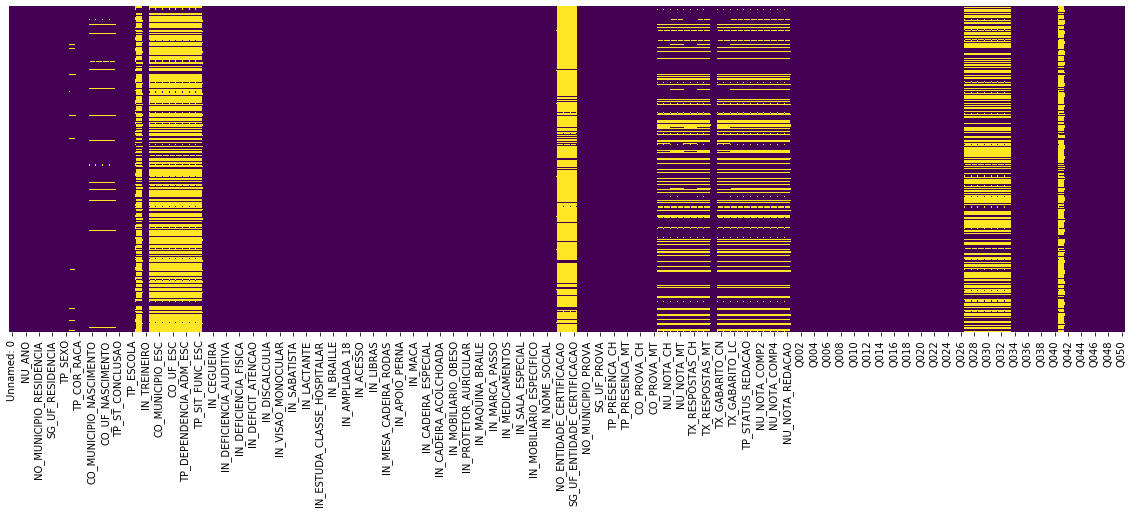

In [15]:
#verificando dados ausentes
plt.figure(figsize=(20,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [32]:
#verificando se as vas escolhidas para o modelo tem valor nulo
#df['TP_SEXO'].isnull().sum()
#df['NU_IDADE'].isnull().sum()
#df['IN_TREINEIRO'].isnull().sum()
#df['TP_ST_CONCLUSAO'].isnull().sum()
df['TP_COR_RACA'].isnull().sum()

0

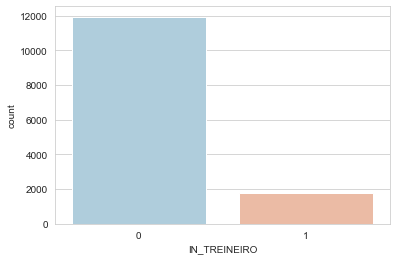

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='IN_TREINEIRO',data=df,palette='RdBu_r')

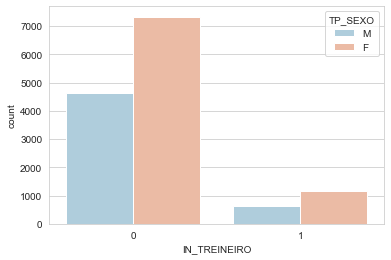

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='IN_TREINEIRO',hue='TP_SEXO',data=df,palette='RdBu_r')

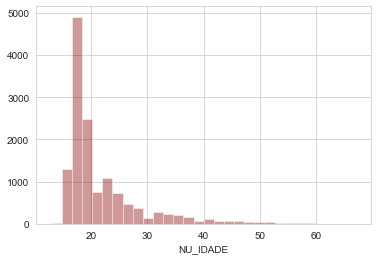

In [23]:
sns.distplot(df['NU_IDADE'].dropna(),kde=False,color='darkred',bins=30)

Text(0.5, 1.0, 'Distribuição de Idade dos Treineiros')

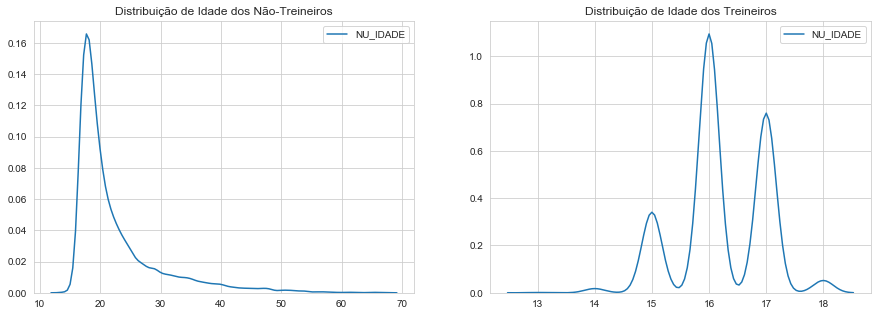

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.kdeplot(df.query('IN_TREINEIRO == 0')['NU_IDADE'], ax=ax[0])
ax[0].set_title('Distribuição de Idade dos Não-Treineiros')
sns.kdeplot(df.query('IN_TREINEIRO == 1')['NU_IDADE'], ax=ax[1])
ax[1].set_title('Distribuição de Idade dos Treineiros')

In [31]:
df['TP_ST_CONCLUSAO'].unique()
#1-Já concluí o Ensino Médio
#2-Estou cursando e concluirei o Ensino Médio em 2016
#3-Estou cursando e concluirei o Ensino Médio após 2016
#4-Não concluí e não estou cursando o Ensino Médio

array([1, 2, 3, 4], dtype=int64)

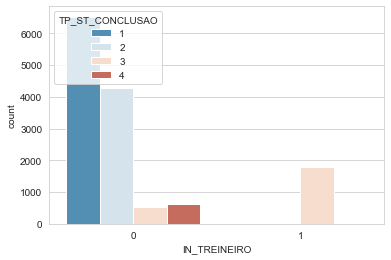

In [41]:
sns.set_style('whitegrid')
sns.countplot(x='IN_TREINEIRO',hue='TP_ST_CONCLUSAO',data=df,palette='RdBu_r')

In [33]:
df['TP_COR_RACA'].unique()
#0-Não declarado
#1-Branca
#2-Preta
#3-Parda
#4-Amarela
#5-Indígena 

array([1, 3, 0, 2, 4, 5], dtype=int64)

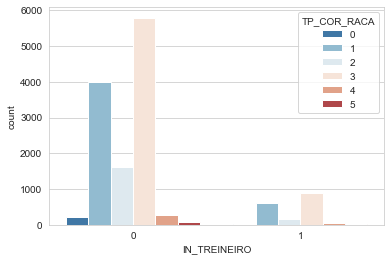

In [42]:
sns.set_style('whitegrid')
sns.countplot(x='IN_TREINEIRO',hue='TP_COR_RACA',data=df,palette='RdBu_r')

In [68]:
#Subseting com as vas que podem influenciar na va resposta
subset = df[['TP_SEXO','NU_IDADE', 'IN_TREINEIRO', 'TP_ST_CONCLUSAO', 'TP_COR_RACA']]
subset.head()

,TP_SEXO,NU_IDADE,IN_TREINEIRO,TP_ST_CONCLUSAO,TP_COR_RACA
0,M,24,0,1,1
1,F,17,0,2,3
2,F,21,0,3,3
3,F,25,0,1,0
4,M,28,0,1,2


In [62]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TP_SEXO          13730 non-null  object
 1   NU_IDADE         13730 non-null  int64 
 2   IN_TREINEIRO     13730 non-null  int64 
 3   TP_ST_CONCLUSAO  13730 non-null  int64 
 4   TP_COR_RACA      13730 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 536.5+ KB


In [69]:
#transformando categóricas em numéricas
subset = pd.get_dummies(subset)
subset.head().T

,0,1,2,3,4
NU_IDADE,24,17,21,25,28
IN_TREINEIRO,0,0,0,0,0
TP_ST_CONCLUSAO,1,2,3,1,1
TP_COR_RACA,1,3,3,0,2
TP_SEXO_F,0,1,1,1,0
TP_SEXO_M,1,0,0,0,1


In [70]:
#separando os dados
X = subset.drop("IN_TREINEIRO", axis = 1)
y = df.IN_TREINEIRO

In [72]:
#observa-se que os dados estão desbalanceados(va resposta)
np.bincount(y)

array([11947,  1783], dtype=int64)

In [76]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
#Intancia Smote
smt = SMOTE()

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1


You should consider upgrading via the 'c:\users\alex\anaconda3\python.exe -m pip install --upgrade pip' command.


In [77]:
#Aplica o SMOTE nos dados (p/ balancear)
X, y = smt.fit_sample(X, y)

In [78]:
#Visualizando a distribuição das amostras
np.bincount(y)

array([11947, 11947], dtype=int64)

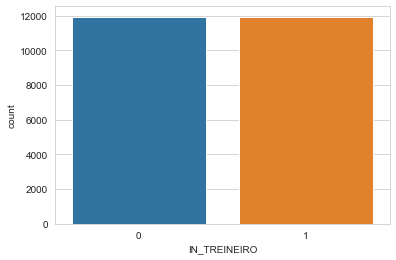

In [80]:
ax = sns.countplot(x=y)

### Importando dados de teste

In [81]:
#importando dados de teste
df1 = pd.read_csv("test.csv")
df1.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,...,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,...,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,...,NaN,NaN,E,F,G,B,B,A,NaN,D
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,...,40.0,480.0,E,E,E,C,B,B,C,A
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,...,80.0,720.0,E,E,E,B,B,B,D,A


In [82]:
df1.shape

(4570, 43)

In [85]:
#Subseting com as vas que podem influenciar na va resposta
sub_test= df1[['TP_SEXO','NU_IDADE', 'TP_ST_CONCLUSAO', 'TP_COR_RACA']]
sub_test.head()

,TP_SEXO,NU_IDADE,TP_ST_CONCLUSAO,TP_COR_RACA
0,F,19,1,1
1,M,24,1,3
2,F,16,3,2
3,F,17,2,1
4,F,19,1,1


In [87]:
sub_test.isnull().sum()

TP_SEXO            0
NU_IDADE           0
TP_ST_CONCLUSAO    0
TP_COR_RACA        0
dtype: int64

In [92]:
#transformando categóricas em numéricas
sub_test = pd.get_dummies(sub_test)
sub_test.head().T

,0,1,2,3,4
NU_IDADE,19,24,16,17,19
TP_ST_CONCLUSAO,1,1,3,2,1
TP_COR_RACA,1,3,2,1,1
TP_SEXO_F,1,0,1,1,1
TP_SEXO_M,0,1,0,0,0


## Regressão Logística

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
#criando e treinando o modelo
logreg = LogisticRegression()
logreg.fit(X,y)

LogisticRegression()

In [93]:
#obtendo as previsões
IN_TREINEIRO = logreg.predict(sub_test)

### Não posso avaliar o modelo pois a base teste não possui a variável resposta

### Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
random_forest = RandomForestClassifier()
random_forest.fit(X, y)

RandomForestClassifier()

In [97]:
IN_TREINEIRO1 = random_forest.predict(sub_test)

In [98]:
comp = pd.DataFrame({'Logística': IN_TREINEIRO, 'Forest': IN_TREINEIRO1})
comp

,Logística,Forest
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
4565,0,0
4566,0,0
4567,0,0
4568,0,0


### Gerando as respostas


In [99]:
pred = pd.DataFrame({"NU_INSCRICAO": df1["NU_INSCRICAO"], "IN_TREINEIRO": IN_TREINEIRO})
pred.to_csv("answer.csv", index = False)